In [1]:
import gym
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import HTML, clear_output
%matplotlib inline

from utils import show_video, dynamic_gpu_usage, play_in_video
from QLearningAgent import QLearningAgent

dynamic_gpu_usage()

1 Physical GPUs, 1 Logical GPUs


In [2]:
env_name = 'CartPole-v1'
recordings = 'recordings/cartPole-q'
env = gym.make(env_name)

play_in_video(env, recordings + "/0")

Total reward: 24.0


In [3]:
state_size = env.observation_space.shape[0]
n_actions = env.action_space.n

agent = QLearningAgent(state_size, n_actions, use_target_network=False, learning_rate=0.01)

play_in_video(env, recordings + "/1", agent)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________
Total reward: 9.0


In [4]:
n_sessions = 10000
n_minibaches = 10
max_steps = 1000
exploration_rate = 0.5

memory = []
er_history = []
reward_history = []
loss_history = []

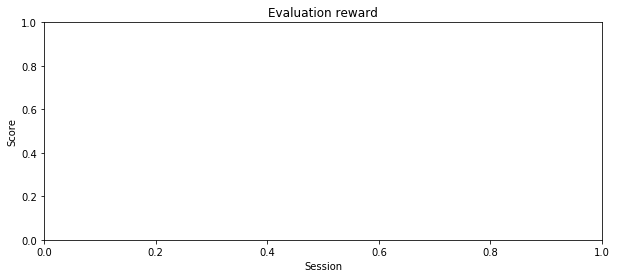

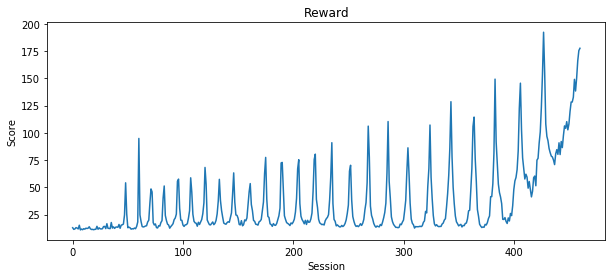

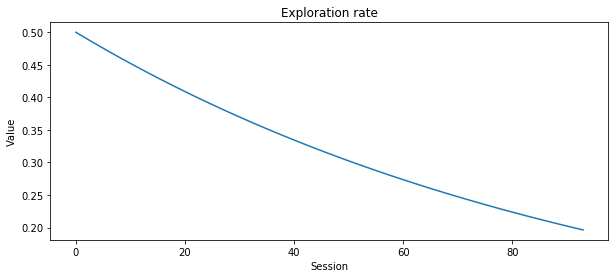

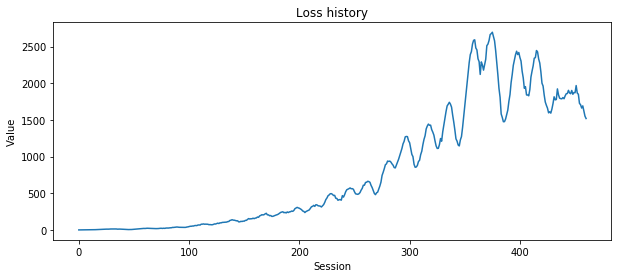

Mini batch: 100%|██████████| 10/10 [00:46<00:00,  4.65s/it]


In [5]:
er_history.append(exploration_rate)

for i in range(n_sessions):
    mini_batch_rewards = []
    for _ in tqdm(range(n_minibaches), total=n_minibaches, desc="Mini batch"):
        state = env.reset()
        total_reward = 0
        n_negative = 0
        for s in range(max_steps):
            action = agent.next_action(state, exploration_rate)
            next_state, reward, is_done, _ = env.step(action)
            memory.append([state, action, reward, next_state, is_done])
            total_reward += reward
            state = next_state
            if is_done:
                break
        
        mini_batch_rewards.append(total_reward)

    memory = memory[-100000:]
    loss = agent.train_on_batch(*list(map(np.array, zip(*random.sample(memory, int(len(memory)/2))))))
    
    loss_history.append(np.mean(loss))

    reward_history.append(np.mean(mini_batch_rewards))

    if i%5 == 0:
        exploration_rate = max(exploration_rate*0.99, 0.01)
        er_history.append(exploration_rate)
    
    if i%5 == 0:
        clear_output()
        plt.figure(figsize=(10,4))
        #plt.plot(test_reward_history)
        plt.title("Evaluation reward")
        plt.ylabel("Score")
        plt.xlabel("Session")
        plt.show()
        
        plt.figure(figsize=(10,4))
        plt.plot(reward_history)
        plt.title("Reward")
        plt.ylabel("Score")
        plt.xlabel("Session")
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(er_history)
        plt.title("Exploration rate")
        plt.ylabel("Value")
        plt.xlabel("Session")
        plt.show()
        
        plt.figure(figsize=(10,4))
        plt.plot(loss_history)
        plt.title("Loss history")
        plt.ylabel("Value")
        plt.xlabel("Session")
        plt.show()

    if reward_history[-1] > 200:
        break

In [6]:
play_in_video(env, recordings + "/2", agent)

Total reward: 212.0
